# **Random Forests on Breat Cancer Wisconsin Data** 

## Load necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer 

## Load breast cancer wisconsin diagnostic dataset from scikit learn.

In [ ]:
X,y=load_breast_cancer(return_X_y=True, as_frame=True)
print(f'There are {X.shape[0]} sample points with {X.shape[1]} features')
print(f'There are {y.nunique()} classes, with {y.value_counts()[0]} in class {y.unique()[0]} and {y.value_counts()[1]} in class {y.unique()[1]}')

There are 569 sample points with 30 features
There are 2 classes, with 212 in class 0 and 357 in class 1


Here is some example sample points.

In [ ]:
X.head().T

Check for missing values. There is no missing values.

In [ ]:
(np.sum(X.isnull()),np.sum(y.isnull())) 

## Exploratory Data Analysis

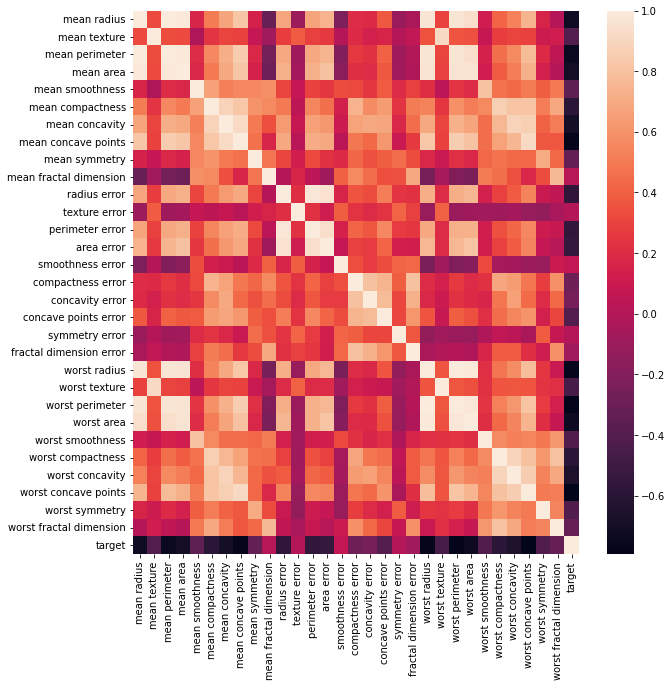

In [ ]:
corr=pd.concat([X,y],axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Apply Random Forests classifier

Randomly split the dataset into training set and test set. The test set is 20% of the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=42)

Fit the random forests classification model, using 500 trees.

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
N=500
rfc=RandomForestClassifier(n_estimators=N, max_depth=15, min_samples_leaf=5, n_jobs=-1)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1)

Evaluate the model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=rfc.predict(X_test)
print(f'The overall accuracy is {np.round(accuracy_score(y_pred,y_test),2)}')
print('\n And here is the confusion matrix:')
confusion_matrix(y_pred,y_test)

The overall accuracy is 0.97

 And here is the confusion matrix:


array([[ 75,   2],
       [  5, 146]])

Now let's examine the feature importances.

Text(0, 0.5, 'Mean decrease in impurity')

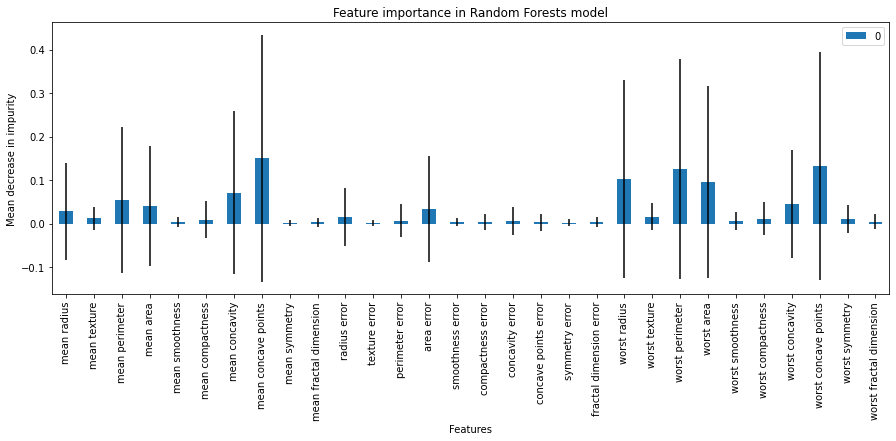

In [ ]:
importances=rfc.feature_importances_
std=np.std([b.feature_importances_ for b in rfc.estimators_], axis=0)
importances=pd.DataFrame(importances,index=X.columns)
fig,ax=plt.subplots(figsize=(15,5))
importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importance in Random Forests model')
ax.set_xlabel('Features')
ax.set_ylabel('Mean decrease in impurity')

See the effect of # of trees. We can see that the model's predicting power stablizes after about 100 trees.

In [ ]:
pred=[]
for tree in rfc.estimators_:
  p=tree.predict_proba(X_test.values)
  pred.append(p[None,:])
pred=np.vstack(pred)
print(pred.shape) # put pred into a tensor with 100 estimators, each estimator estimates binary probability of 114 sample points.

(500, 228, 2)


In [ ]:
pred_seq=np.cumsum(pred,axis=0)/np.arange(1,N+1)[:,None,None]
vote=np.argmax(pred_seq,axis=2)
print(vote.shape)
score_seq=[accuracy_score(y_test,y_pred) for y_pred in vote]

(500, 228)


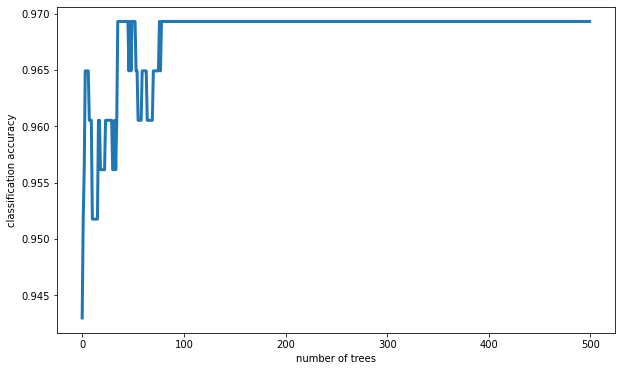

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(score_seq, linewidth=3)
plt.xlabel('number of trees')
plt.ylabel('classification accuracy');